<a href="https://colab.research.google.com/github/nikilstark/MULTI-LABEL/blob/master/Multi_Label.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu

     |████████████████████████████████| 421.8MB 22kB/s 
     |████████████████████████████████| 3.9MB 56.9MB/s 
     |████████████████████████████████| 450kB 45.6MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [3]:
!git clone https://github.com/nikilstark/MULTI-LABEL.git

Cloning into 'MULTI-LABEL'...
remote: Enumerating objects: 7874, done.
remote: Total 7874 (delta 0), reused 0 (delta 0), pack-reused 7874
Receiving objects: 100% (7874/7874), 246.59 MiB | 48.77 MiB/s, done.
Checking out files: 100% (7872/7872), done.


In [0]:
train = pd.read_csv('/content/MULTI-LABEL/train.csv')

In [5]:
train.shape

(7254, 27)

In [6]:
train.head(5)

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [7]:
img_width = 350
img_height = 350
X=[]
for i in tqdm(range(train.shape[0])):
    paths ='/content/MULTI-LABEL/Images/'+train['Id'][i]+ '.jpg'
    img = image.load_img(paths,target_size=(img_width,img_height,3))
    img = image.img_to_array(img)
    img = img/255
    X.append(img)
y = np.array(X)  

100%|██████████| 7254/7254 [00:28<00:00, 253.89it/s]


In [8]:
y.shape

(7254, 350, 350, 3)

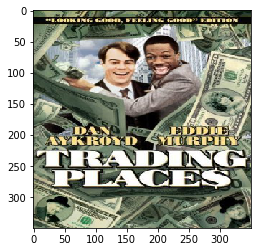

In [11]:
plt.imshow(y[2])

In [12]:
train['Genre'][2]

"['Comedy']"

In [0]:
x = y

In [14]:
y= train.drop(['Id','Genre'],axis = 1)
y = y.to_numpy()
y.shape

(7254, 25)

In [0]:
x_train,x_test,y_train,y_test =train_test_split(x,y,random_state = 0,test_size = 0.2)

In [0]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=x_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(25,activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 348, 348, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 348, 348, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 174, 174, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 174, 174, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 172, 172, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 172, 172, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 86, 86, 32)       

In [0]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
history = model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Train on 5803 samples, validate on 1451 samples
Epoch 1/5
5803/5803 [==============================] - 176s 30ms/sample - loss: 0.5930 - accuracy: 0.7066 - val_loss: 0.6185 - val_accuracy: 0.7043
Epoch 2/5
5803/5803 [==============================] - 176s 30ms/sample - loss: 0.2765 - accuracy: 0.9042 - val_loss: 0.3868 - val_accuracy: 0.8643
Epoch 3/5
5803/5803 [==============================] - 179s 31ms/sample - loss: 0.2475 - accuracy: 0.9114 - val_loss: 0.4821 - val_accuracy: 0.8782
Epoch 4/5
5803/5803 [==============================] - 180s 31ms/sample - loss: 0.2389 - accuracy: 0.9129 - val_loss: 0.5012 - val_accuracy: 0.8766
Epoch 5/5
5803/5803 [==============================] - 176s 30ms/sample - loss: 0.2323 - accuracy: 0.9152 - val_loss: 0.3487 - val_accuracy: 0.8996


In [0]:
def plot_learningcurve(history,epochs):
  epoch_range = range(1,epochs+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train','val'],loc='upper left')
  plt.show()

  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train','val'],loc='upper left')
  plt.show()

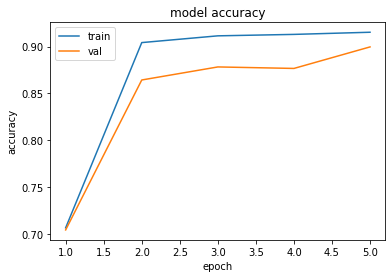

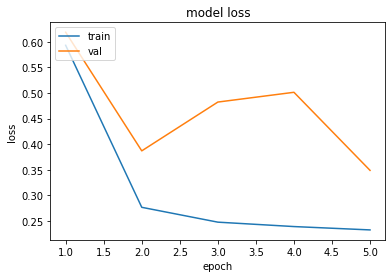

In [26]:
plot_learningcurve(history,5)

Drama
Horror
Action


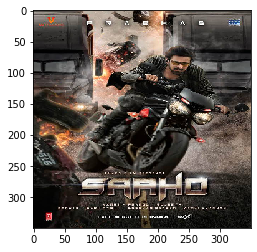

In [32]:
img = image.load_img('/content/MULTI-LABEL/saaho.jpg',target_size=(img_width,img_height,3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1,img_width,img_height,3)

classes =train.columns[2:]

y_prob = model.predict(img)
top_3_pred = np.argsort(y_prob[0])[:-4:-1]
for i in range(3):
  print(classes[top_3_pred[i]])

Drama
Action
Adventure


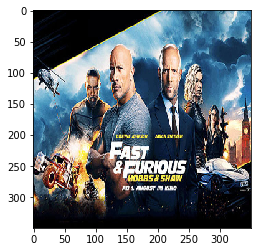

In [34]:
img = image.load_img('/content/MULTI-LABEL/fast.jpg',target_size=(img_width,img_height,3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1,img_width,img_height,3)

classes =train.columns[2:]

y_prob = model.predict(img)
top_3_pred = np.argsort(y_prob[0])[:-4:-1]
for i in range(3):
  print(classes[top_3_pred[i]])

Drama
Romance
Comedy


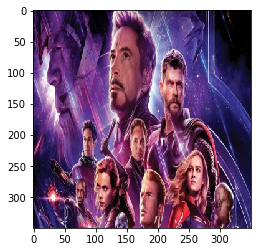

In [36]:
img = image.load_img('/content/MULTI-LABEL/endgame.jpg',target_size=(img_width,img_height,3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255

img = img.reshape(1,img_width,img_height,3)

classes =train.columns[2:]

y_prob = model.predict(img)
top_3_pred = np.argsort(y_prob[0])[:-4:-1]
for i in range(3):
  print(classes[top_3_pred[i]])